### Import of Libraries

In [127]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
import sklearn.decomposition 
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

### Getting Data

The study collects the data using a microcontroller. It was linked to a ZigBee radio, which was used to relay the data to a recording station. A digital camera was utilised to assess whether or not the room was inhabited. Every minute, the camera time stamped an image, which was then manually examined to identify the data. The humidity ratio is another additional variable in the data model, calculated as ( W = 0.622*(pw/(p-pw)) ).

The data was collected in February in Mons, Belgium, during the winter. The room was heated by hot water radiators, which kept the temperature above 19 degrees Celsius. The models are tested for data sets with the office door open and closed in order to estimate the difference in occupancy detection accuracy provided by the models. The measurements were obtained at 14-second intervals/3-4 times every minute, and then averaged for that minute.

Attribute Information is as follows:

1. date time year-month-day hour:minute:second
2. Temperature, in Celsius
3. Relative Humidity, %
4. Light, in Lux
5. CO2, in ppm
6. Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
7. Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

In [128]:
tempLst=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 2039, 2040, 2043, 2047, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2076, 2081, 2082, 2083, 2084, 2092, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 3060, 3061, 3062, 3065, 3066, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 3550, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 3696, 3697, 3698, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3831, 3832, 6701, 6702, 6703, 6704, 6705, 6706, 6707, 6708, 6709, 6710, 6711, 6712, 6713, 6714, 6715, 6716, 6717, 6718, 6719, 6720, 6721, 6722, 6723, 6724, 6725, 6726, 6727, 6728, 6729, 6730, 6731, 6732, 6733, 6734, 6735, 6736, 6737, 6738, 6739, 6740, 6741, 6742, 6743, 6744, 6745, 6746, 6747, 6748, 6749, 6750, 6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6759, 6760, 6761, 6762, 6763, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771, 6772, 6773, 6774, 6775, 6776, 6777, 6778, 6779, 6780, 6781, 6782, 6783, 6784, 6785, 6786, 6787, 6788, 6789, 6790, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799, 6800, 6801, 6802, 6803, 6804, 6805, 6806, 6807, 6808, 6809, 6810, 6811, 6812, 6813, 6814, 6815, 6816, 6817, 6818, 6819, 6820, 6821, 6822, 6823, 6824, 6825, 6826, 6827, 6828, 6829, 6830, 6831, 6832, 6833, 6834, 6835, 6836, 6837, 6838, 6839, 6840, 6841, 6842, 6843, 6844, 6845, 6846, 6847, 6848, 6849, 6850, 6851, 6852, 6853, 6854, 6855, 6856, 6857, 6858, 6859, 6860, 6861, 6862, 6863, 6864, 6865, 6866, 6867, 6868, 6869, 6870, 6871, 6872, 6873, 6874, 6875, 6876, 6877, 6878, 6879, 6880, 6881, 6882, 6883, 6884, 6885, 6886, 6887, 6888, 6889, 6890, 6891, 6892, 6893, 6894, 6895, 6896, 6897, 6898, 6899, 6900, 6901, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 6910, 6911, 6912, 6913, 6914, 6915, 6916, 6917, 6918, 6919, 6920, 6921, 6922, 6923, 6924, 6925, 6926, 6927, 6928, 6929, 6930, 6931, 6932, 6933, 6934, 6935, 6936, 6937, 6938, 6939, 6940, 6941, 6942, 6943, 6944, 6945, 6946, 6947, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959, 6960, 6961, 6962, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974, 6975, 6976, 6977, 6978, 6979, 6980, 6981, 6982, 6983, 6984, 6985, 6986, 6987, 6988, 6989, 6990, 6991, 6992, 6993, 6994, 6995, 6996, 6997, 6998, 6999, 7000, 7001, 7002, 7003, 7004, 7005, 7006, 7007, 7008, 7009, 7010, 7011, 7012, 7013, 7014, 7015, 7016, 7017, 7018, 7019, 7020, 7021, 7022, 7023, 7024, 7025, 7026, 7027, 7028, 7029, 7030, 7031, 7032, 7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042, 7043, 7044, 7045, 7046, 7047, 7048, 7049, 7050, 7051, 7052, 7053, 7054, 7055, 7056, 7057, 7058, 7059, 7060, 7061, 7062, 7063, 7064, 7065, 7066, 7067, 7068, 7069, 7070, 7071, 7072, 7073, 7074, 7075, 7076, 7077, 7078, 7079, 7080, 7081, 7082, 7083, 7084, 7085, 7086, 7087, 7088, 7089, 7090, 7091, 7092, 7093, 7094, 7095, 7096, 7097, 7098, 7099, 7100, 7101, 7102, 7103, 7104, 7105, 7106, 7107, 7108, 7109, 7110, 7111, 7112, 7113, 7114, 7115, 7116, 7117, 7118, 7119, 7120, 7121, 7122, 7123, 7124, 7125, 7126, 7127, 7128, 7129, 7130, 7131, 7132, 7133, 7134, 7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7143, 7144, 7145, 7146, 7147, 7148, 7149, 7150, 7151, 7152, 7153, 7154, 7155, 7156, 7157, 7158, 7159, 7160, 7161, 7162, 7163, 7164, 7165, 7166, 7167, 7168, 7169, 7170, 7171, 7172, 7173, 7174, 7175, 7176, 7177, 7178, 7179, 7180, 7181, 7182, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7215, 7216, 7217, 7218, 7219, 7220, 7221, 7222, 7223, 7224, 7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7258, 7259, 7260, 7261, 7262, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7300, 7301, 7302, 7303, 7304, 7305, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7460, 7463, 8108, 8109, 8110, 8111, 8112, 8113, 8114, 8115, 8116, 8117, 8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127, 8128, 8129, 8130, 8131, 8132, 8133, 8134, 8135, 8136, 8137, 8138, 8139, 8140, 8141, 8142]
tempLst1=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 5400, 24, 25, 26, 27, 28, 29, 30, 32, 5281, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290, 5291, 5292, 5293, 5294, 5295, 5296, 5297, 5298, 2413]
tempLst2=[5248, 5249, 5250, 5251, 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 14, 5247]
tempLst3=[0, 5235]
tempLst4=[5234]

In [129]:
df = pd.read_csv('datatraining.csv')
df.drop(tempLst, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(tempLst1, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(tempLst2, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(tempLst3, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(tempLst4, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
#df=df.head(5000)
#df['date'] = df['date'].str.slice(start=11)
#df['date'] = df['date'].apply(lambda x: timeToNum(x))
df=df.drop(columns=["id","date"])

In [130]:
df.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,22.29,27.390000,0.0,621.000000,0.004559,0
1,22.34,27.390000,0.0,626.500000,0.004573,0
2,22.29,27.390000,0.0,622.000000,0.004559,0
3,22.29,27.390000,0.0,621.500000,0.004559,0
4,22.29,27.356667,0.0,616.333333,0.004553,0


In [131]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    5974 non-null   float64
 1   Humidity       5974 non-null   float64
 2   Light          5974 non-null   float64
 3   CO2            5974 non-null   float64
 4   HumidityRatio  5974 non-null   float64
 5   Occupancy      5974 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 280.2 KB
Number of duplicated rows is:  621
Number of rows with NaNs is:  0


### Exploratory Data Analysis

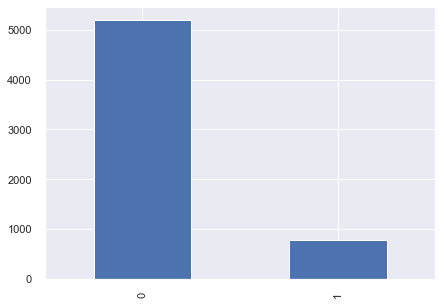

In [132]:
df['Occupancy'].value_counts().plot(kind='bar')
plt.ylabel('')
plt.show()

##### Extracting Attribute Matrix

In [133]:
X = df.drop(columns=['Occupancy'])
X.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio
0,22.29,27.390000,0.0,621.000000,0.004559
1,22.34,27.390000,0.0,626.500000,0.004573
2,22.29,27.390000,0.0,622.000000,0.004559
3,22.29,27.390000,0.0,621.500000,0.004559
4,22.29,27.356667,0.0,616.333333,0.004553


##### Original Data

<AxesSubplot:>

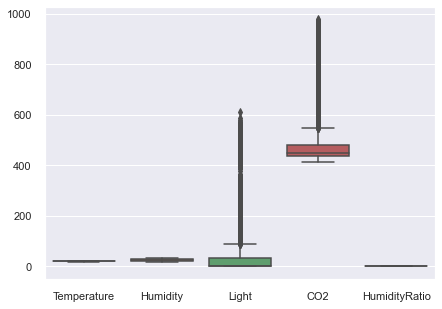

In [134]:
sns.boxplot(data=X)

##### Standardized Data

In [135]:
# Generates a Standardized matrix with mean zero and variance is 1

Xs = StandardScaler().fit_transform(X)  
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio
0,1.876660,0.377261,-0.509375,0.919545,1.265789
1,1.928373,0.377261,-0.509375,0.963226,1.288620
2,1.876660,0.377261,-0.509375,0.927487,1.265789
3,1.876660,0.377261,-0.509375,0.923516,1.265789
4,1.876660,0.370345,-0.509375,0.882483,1.256671


In [136]:
X.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,5.974000e+03,5.974000e+03,5.974000e+03,5.974000e+03,5.974000e+03
mean,2.816480e-15,-7.612108e-16,-1.141816e-16,-3.806054e-17,3.806054e-16
std,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00
min,-1.526093e+00,-1.831229e+00,-5.093746e-01,-7.343641e-01,-1.748930e+00
25%,-1.008958e+00,-9.484557e-01,-5.093746e-01,-5.298591e-01,-8.427533e-01
50%,-8.845600e-02,1.303748e-01,-5.093746e-01,-4.305849e-01,-8.116437e-04
75%,7.493038e-01,8.565107e-01,-2.935437e-01,-1.807447e-01,7.473126e-01
max,2.714419e+00,1.852354e+00,3.241406e+00,3.762760e+00,2.232658e+00


##### Covariance Data

In [137]:
cova = np.cov(X.transpose())
covaMatrix = pd.DataFrame(cova)
covaMatrix.head(15)

,0,1,2,3,4
0,1.000167,-0.624493,0.542621,0.514394,-0.382030
1,-0.624493,1.000167,-0.424969,-0.235068,0.959369
2,0.542621,-0.424969,1.000167,0.695504,-0.319732
3,0.514394,-0.235068,0.695504,1.000167,-0.088115
4,-0.382030,0.959369,-0.319732,-0.088115,1.000167


##### Box and Whisker Plots

<AxesSubplot:>

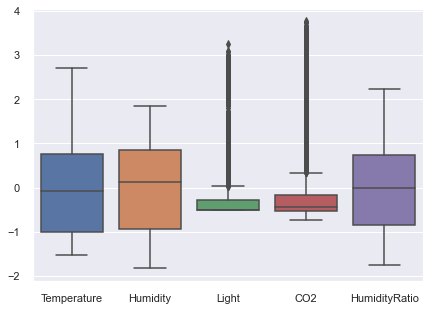

In [138]:
sns.boxplot(data=X)

##### Correlation Matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Temperature'),
  Text(0, 1.5, 'Humidity'),
  Text(0, 2.5, 'Light'),
  Text(0, 3.5, 'CO2'),
  Text(0, 4.5, 'HumidityRatio')])

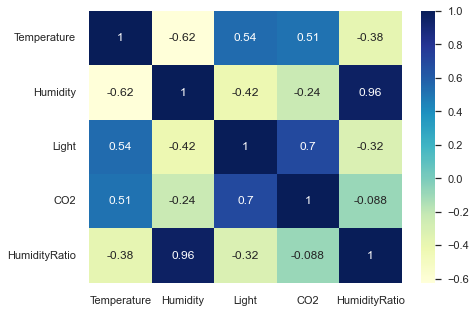

In [139]:
sns.heatmap(X.corr(), cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)

##### Pair Plot

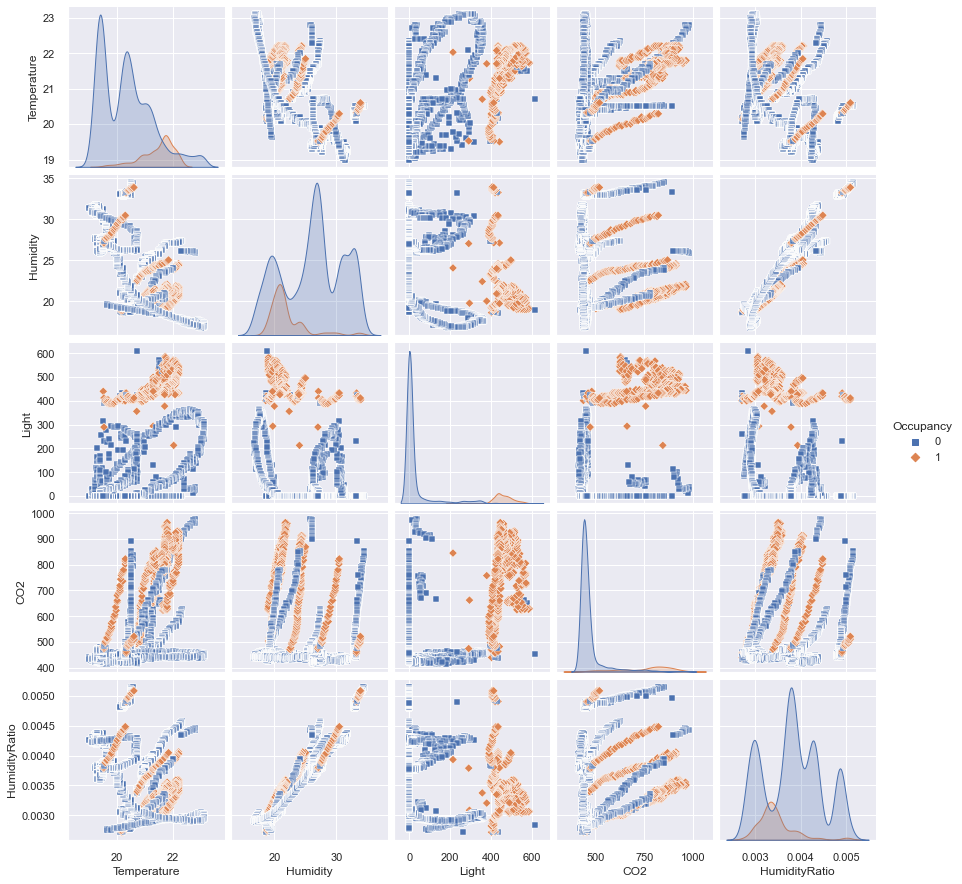

In [140]:
sns.pairplot(df, hue='Occupancy', markers=["s", "D"], kind="scatter")
plt.show()

### Principal Component Analysis

In [141]:
pcas = sklearn.decomposition.PCA()
pcas.fit_transform(X)
A = pcas.components_.T 
Lambda = pcas.explained_variance_ 

##### Eigenvalues and Eigenvectors

In [142]:
print(f'Eigenvectors:\n{A}')
print(f'Eigenvalues:\n{Lambda}')

Eigenvectors:
[[ 0.47055902  0.13188082  0.82605142 -0.16893061  0.22423907]
 [-0.50796554  0.42341204 -0.00244441 -0.1117411   0.74175549]
 [ 0.44552861  0.39181182 -0.44748312 -0.66881601 -0.02077872]
 [ 0.36575385  0.59120079 -0.16452668  0.69951307  0.01783743]
 [-0.43390504  0.54799162  0.3005377  -0.1494757  -0.63147898]]
Eigenvalues:
[2.94015885e+00 1.32582459e+00 4.66625498e-01 2.67338406e-01
 8.89760177e-04]


In [143]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [144]:
# Top features in signifacnt PCs
out['topfeat']

,PC,feature,loading,type
0,PC1,Humidity,-0.507966,best
1,PC2,CO2,0.591201,best
2,PC3,Temperature,0.826051,best
3,PC4,CO2,0.699513,best
4,PC4,Light,-0.668816,weak
5,PC2,HumidityRatio,0.547992,weak


##### PCs

In [145]:
out['PC']

,PC1,PC2,PC3,PC4
0,0.251597,1.444931,2.006359,0.435526
1,0.282002,1.490086,2.048752,0.453933
2,0.254502,1.449626,2.005053,0.441082
3,0.253050,1.447278,2.005706,0.438304
4,0.245511,1.415095,2.009734,0.411736
...,...,...,...,...
5969,-0.862607,2.632932,-0.250696,-1.814954
5970,-0.845520,2.660056,-0.202018,-1.820114
5971,-0.843569,2.704372,-0.148129,-1.828766
5972,-0.844363,2.738172,-0.177314,-1.790065


In [146]:
# To be used later for Control Charts

z1 = out["PC"].PC1
z2 = out["PC"].PC2
z3 = out["PC"].PC3

In [147]:
A = out['loadings'].T
print(A)

                    PC1       PC2       PC3       PC4
Temperature    0.470559  0.131881  0.826051 -0.168931
Humidity      -0.507966  0.423412 -0.002444 -0.111741
Light          0.445529  0.391812 -0.447483 -0.668816
CO2            0.365754  0.591201 -0.164527  0.699513
HumidityRatio -0.433905  0.547992  0.300538 -0.149476


##### Scree Plot

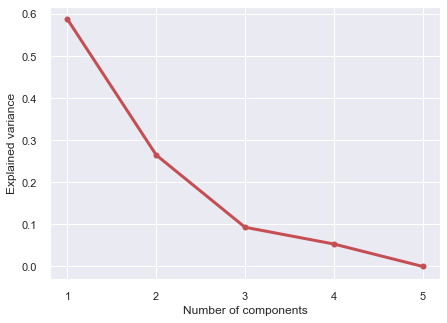

In [148]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

##### Explained Variance

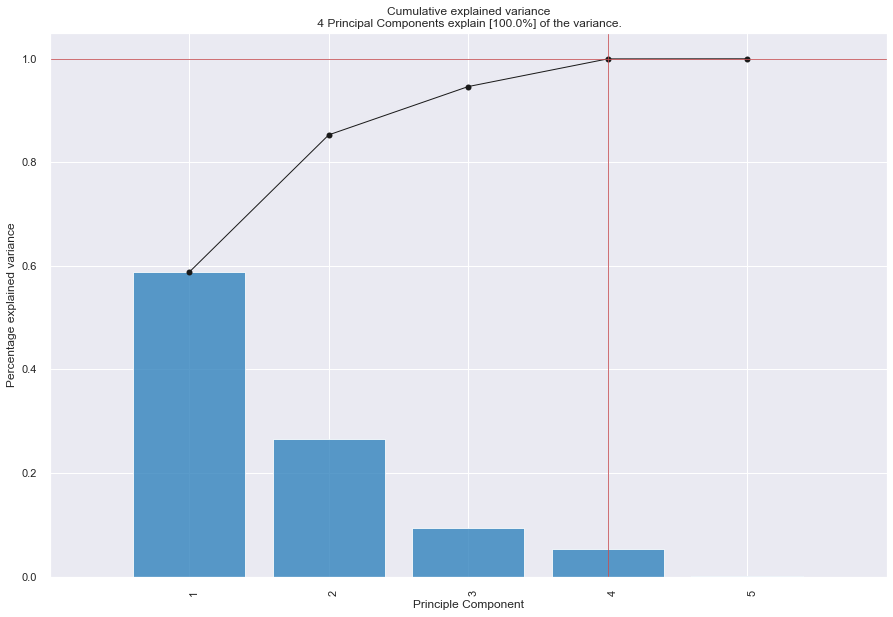

<Figure size 504x360 with 0 Axes>

In [149]:
model.plot();

##### PC Coefficient Plot

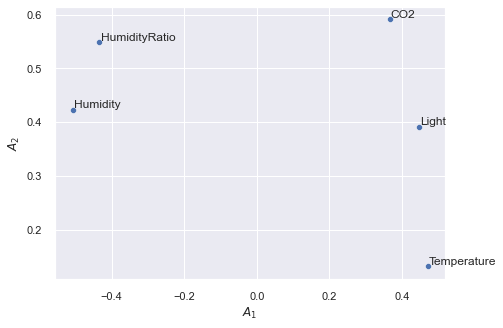

In [150]:
variables = list(df.columns)
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
     plt.text(x=A.PC1[i]+0.003,y=A.PC2[i]+0.003, s=variables[i])

##### BiPlot

In [151]:
#model.biplot(label=False, legend=False, cmap=None)

In [152]:
#model.biplot3d(label=False, legend=False, cmap=None)

##### Control Chart

[]


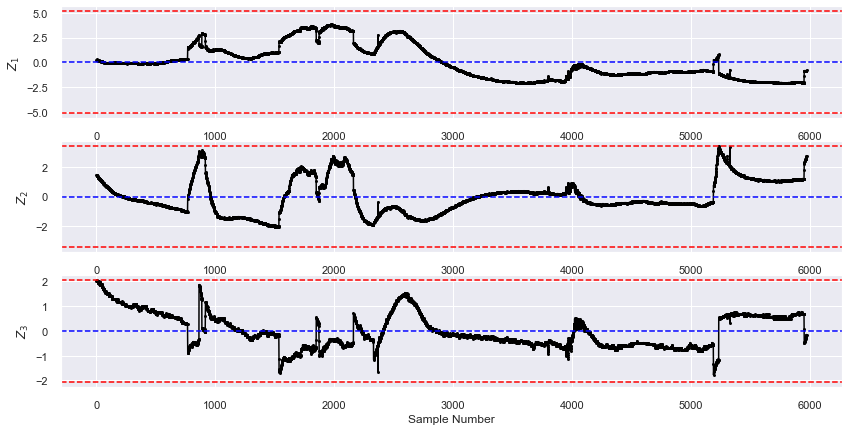

In [153]:
from math import sqrt
fig, axs = plt.subplots(3, figsize=(14,7))
tempLst=[]

# Z1 Chart
axs[0].set(ylabel='$Z_1$', xlabel='Sample Number')
axs[0].plot(z1, linestyle='-', marker='.', color='black')
axs[0].axhline(3*(sqrt(Lambda[0])), color='red', linestyle='dashed')
axs[0].axhline(-3*(sqrt(Lambda[0])), color='red', linestyle='dashed')
axs[0].axhline(0, color='blue', linestyle='dashed')

# Z2 Chart
axs[1].set(ylabel='$Z_2$', xlabel='Sample Number')
axs[1].plot(z2, linestyle='-', marker='.', color='black')
axs[1].axhline(3*(sqrt(Lambda[1])), color='red', linestyle='dashed')
axs[1].axhline(-3*(sqrt(Lambda[1])), color='red', linestyle='dashed')
axs[1].axhline(0, color='blue', linestyle='dashed')

# Z3 Chart
axs[2].set(ylabel='$Z_3$', xlabel='Sample Number')
axs[2].plot(z3, linestyle='-', marker='.', color='black')
axs[2].axhline(3*(sqrt(Lambda[2])), color='red', linestyle='dashed')
axs[2].axhline(-3*(sqrt(Lambda[2])), color='red', linestyle='dashed')
axs[2].axhline(0, color='blue', linestyle='dashed')

# Validate points 
z1_control = True
for i in range(len(z1)):
    if z1[i] > 3*(sqrt(Lambda[0])) or z1[i] < -3*(sqrt(Lambda[0])):
        tempLst.append(i)
        z1_control = False
if z1_control == False:
    print('Points plotted in Z1 are not in control limits.')

z2_control = True
for i in range(len(z2)):
    if z2[i] > 3*(sqrt(Lambda[1])) or z2[i] < -3*(sqrt(Lambda[1])):
        tempLst.append(i)
        z2_control = False
if z2_control == False:
    print('Points plotted in Z2 are not in control limits.')
    
z3_control = True
for i in range(len(z3)):
    if z3[i] > 3*(sqrt(Lambda[2])) or z3[i] < -3*(sqrt(Lambda[2])):
        tempLst.append(i)
        z3_control = False
if z3_control == False:
    print('Points plotted in Z3 are not in control limits.')
    
tempLst=list(set(tempLst))
print(tempLst)

### Classification

In [154]:
data=df
df1 = pd.read_csv('datatest.csv')
data_unseen = df1.drop(columns=["id","date"])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5974, 6)
Unseen Data For Predictions: (2665, 6)


In [155]:
from pycaret.classification import *
clf = setup(data=data, target='Occupancy', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,Occupancy
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5974, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [156]:
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9967,0.9998,0.9906,0.9835,0.9869,0.9850,0.9851,0.1570
lightgbm,Light Gradient Boosting Machine,0.9967,0.9996,0.9906,0.9835,0.9869,0.9850,0.9851,0.0520
rf,Random Forest Classifier,0.9964,0.9987,0.9906,0.9816,0.9860,0.9839,0.9840,0.2420
lda,Linear Discriminant Analysis,0.9957,0.9976,1.0000,0.9677,0.9835,0.9810,0.9812,0.0140
knn,K Neighbors Classifier,0.9955,0.9964,0.9906,0.9745,0.9823,0.9797,0.9799,0.0460
ridge,Ridge Classifier,0.9955,0.0000,0.9962,0.9692,0.9824,0.9798,0.9800,0.0120
qda,Quadratic Discriminant Analysis,0.9952,0.9988,0.9943,0.9693,0.9815,0.9788,0.9790,0.0140
ada,Ada Boost Classifier,0.9952,0.9987,0.9849,0.9778,0.9812,0.9785,0.9786,0.0890
gbc,Gradient Boosting Classifier,0.9952,0.9992,0.9849,0.9779,0.9813,0.9785,0.9786,0.1850
lr,Logistic Regression,0.9947,0.9989,0.9906,0.9692,0.9796,0.9766,0.9768,0.0240


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

Classifiers